In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile

In [ ]:
!nvidia-smi

Mon Jun 24 18:33:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Creating helper function

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-04 15:13:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-04 15:13:33 (95.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2024-07-04 15:13:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 74.125.195.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   182MB/s    in 0.9s    

2024-07-04 15:13:35 (182 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

train_data = image_dataset_from_directory(directory=train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)
test_data = image_dataset_from_directory(directory=test_dir,
                                            image_size=(224,224),
                                            label_mode='categorical',
                                            batch_size=32)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[  9.642858    10.642858     2.642857  ]
   [  9.          10.           1.9999999 ]
   [  8.352041     7.7091837    1.1479592 ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 11.663265    10.668367     3.        ]
   [ 11.928572     9.142857     2.0714283 ]
   [ 10.872449     7.8724484    0.87244856]
   ...
   [  0.7296123    0.7296123    0.7296123 ]
   [  0.9285717    0.9285717    0.9285717 ]
   [  0.           0.           0.        ]]

  [[  9.719388     4.2908163    0.        ]
   [ 10.428572     5.           0.        ]
   [ 12.908163     7.785714     1.4030609 ]
   ...
   [  0.7857361    0.7857361    0.7857361 ]
   [  1.           1.           1.        ]
   [  0.           0.           0.        ]]

  ...

  [[ 21.           8.           0.        ]
   [ 21.729612     8.729612     0.7296123 ]
   [ 23.168373     9.4031       1.7857361 ]
   ...
   [ 93.56595     83.208

In [ ]:
model1 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 1s 0us/step


In [ ]:
model1.trainable= False

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x = model1(inputs)
print(x.shape)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(x.shape)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='outputlayer')(x)

model_0 = tf.keras.Model(inputs, outputs)

(None, 7, 7, 1280)
(None, 1280)


In [ ]:
model_0.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history_0=model_0.fit(train_data, epochs=5, callbacks=[create_tensorboard_callback('tensorboard', 'efficientnet_v2')], validation_data=test_data, validation_steps=0.25*len(test_data), steps_per_epoch=len(train_data))

Saving TensorBoard log files to: tensorboard/efficientnet_v2/20240704-151405
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9135 - accuracy: 0.3773

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5792 - accuracy: 0.8508


[0.579196035861969, 0.8507999777793884]

In [ ]:
for layer_number, layer in enumerate(model1.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
model1.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 outputlayer (Dense)         (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

## Getting a feature vector from a trainned model

In [ ]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor {input_tensor.shape}")
print(f"Shape of global avearge pooled tensor {global_average_pooled_tensor.shape}\n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor (1, 4, 4, 3)
Shape of global avearge pooled tensor (1, 3)



In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2)
], name="data_augmentation")

(-0.5, 569.5, 511.5, -0.5)

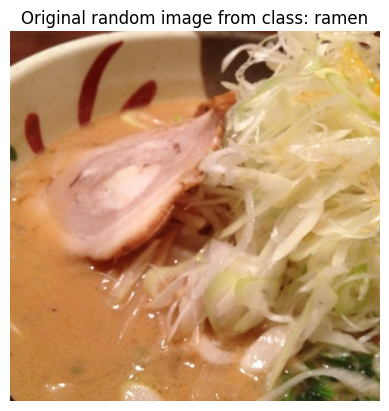

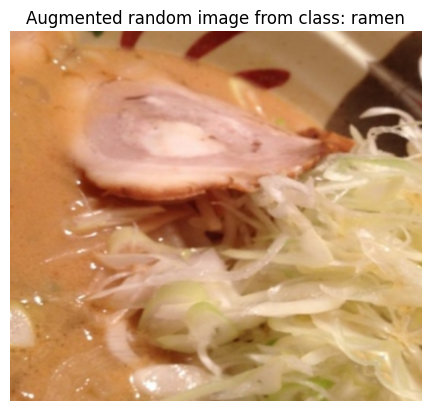

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_10_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis("off")

augmented_random_image = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_random_image/255.))
plt.title(f"Augmented random image from class: {target_class}")
plt.axis("off")


In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax", name="output_layers")(x)
model_1 = keras.Model(inputs, outputs)

model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_1=model_1.fit(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=test_data, validation_steps=0.25*len(test_data), callbacks=[create_tensorboard_callback("transfer_learning", "!_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/!_percent_data_aug/20240622-164953
Epoch 1/5
24/24 [==============================] - 123s 5s/step - loss: 1.9932 - accuracy: 0.3333 - val_loss: 1.4560 - val_accuracy: 0.6734
Epoch 2/5
24/24 [==============================] - 95s 4s/step - loss: 1.3848 - accuracy: 0.6653 - val_loss: 1.0275 - val_accuracy: 0.7812
Epoch 3/5
24/24 [==============================] - 137s 6s/step - loss: 1.0797 - accuracy: 0.7347 - val_loss: 0.8213 - val_accuracy: 0.8141
Epoch 4/5
24/24 [==============================] - 144s 6s/step - loss: 0.9147 - accuracy: 0.7760 - val_loss: 0.6969 - val_accuracy: 0.8328
Epoch 5/5
24/24 [==============================] - 139s 6s/step - loss: 0.8014 - accuracy: 0.8147 - val_loss: 0.6322 - val_accuracy: 0.8375


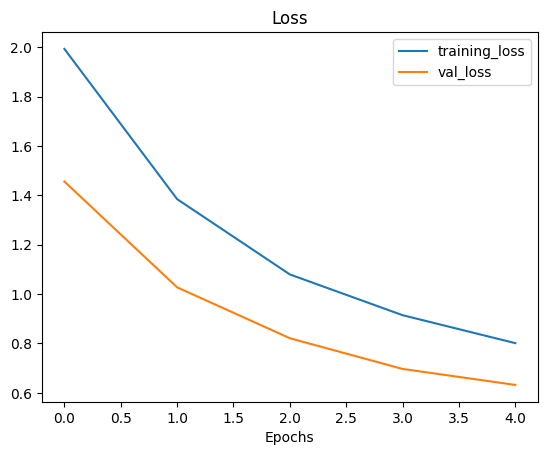

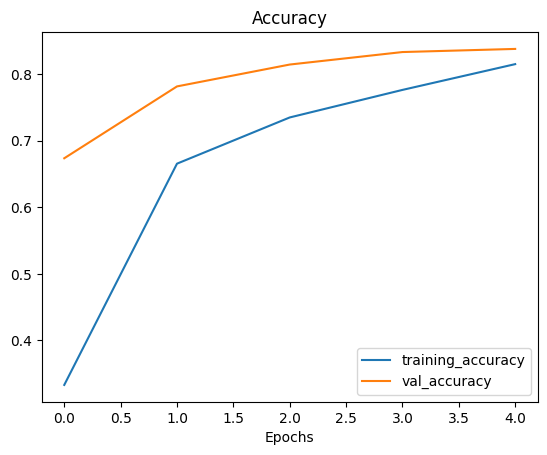

In [ ]:
plot_loss_curves(history_1)

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layers (Dense)       (None, 10)                12810     
                                                           

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 203s 3s/step - loss: 0.6447 - accuracy: 0.8292


[0.644682765007019, 0.829200029373169]

In [ ]:
train_dir_10_precent = "10_food_classes_10_percent/train/"
test_dir_10_precent = "10_food_classes_10_percent/test/"

# Model 2 : feature extraction transfer learning 10% of data and data augmentation

In [ ]:
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
#unzip_data("10_food_classes_10_percent")

train_10_percent_dir = "10_food_classes_10_percent/train/"
test_10_percent_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_10_percent_dir, label_mode="categorical", image_size=(224,224))
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_10_percent_dir, label_mode="categorical", image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name="data_augmentation")

input_shape = (224,224,3)


In [ ]:
from tensorflow.keras import layers


model_base = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
model_base.trainable=False

inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = data_augmentation(inputs)
x = model_base(x, training=False)
x = layers.GlobalAveragePooling2D(name="gobal_average_pooling_layers")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
check_point_path = "ten_precent_model_checkpoints_weights/checkpoints.ckpt"
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path, save_weights_only=True, save_best_only=False, save_freg="epochs", verbose=1)

In [ ]:
history_2 = model_2.fit(train_data_10_percent, validation_data=test_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_steps=int(0.25*len(test_data_10_percent)), callbacks=[create_tensorboard_callback("transferlearning", "10_percent_data_aug"), checkpoints_callback])

Saving TensorBoard log files to: transferlearning/10_percent_data_aug/20240624-183405
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9708 - accuracy: 0.3440
Epoch 1: saving model to ten_precent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 31s 848ms/step - loss: 1.9708 - accuracy: 0.3440 - val_loss: 1.4362 - val_accuracy: 0.6743
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4137 - accuracy: 0.6507
Epoch 2: saving model to ten_precent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 15s 605ms/step - loss: 1.4137 - accuracy: 0.6507 - val_loss: 1.0108 - val_accuracy: 0.8026
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0934 - accuracy: 0.7360
Epoch 3: saving model to ten_precent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 9s 380ms/step - loss: 1.0934 - accuracy: 0.7360 - val_loss: 0.7890 - val_accuracy: 0.8273


In [ ]:
result_10_percent_data = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 116ms/step - loss: 0.6510 - accuracy: 0.8352


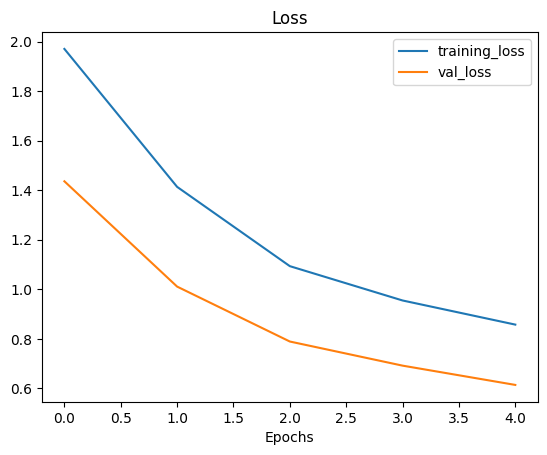

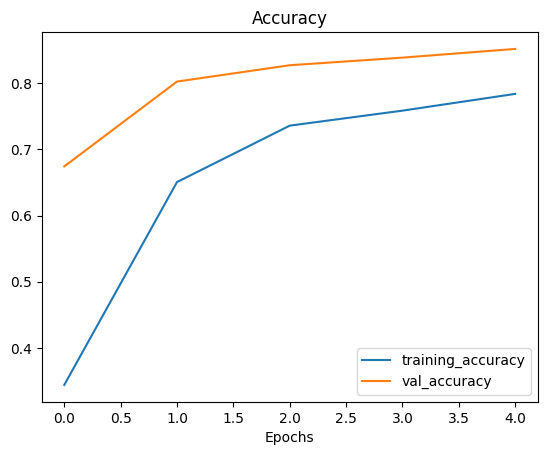

In [ ]:
plot_loss_curves(history_2)

## Load check pointed weights

In [ ]:
model_2.load_weights(check_point_path)

In [ ]:
loaded_weights_model_resulst = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 96ms/step - loss: 0.6510 - accuracy: 0.8352


In [ ]:
loaded_weights_model_resulst

[0.6509779691696167, 0.8352000117301941]

In [ ]:
import numpy as np
np.isclose(np.array(loaded_weights_model_resulst), np.array(result_10_percent_data))

array([ True,  True])

In [ ]:
print(np.array(loaded_weights_model_resulst)- np.array(result_10_percent_data))

[5.96046448e-08 0.00000000e+00]


## Create model 3 : Fine-tuning an existing model on 100% of the data

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7869f26074c0> True
<keras.src.engine.sequential.Sequential object at 0x7869f205ffd0> True
<keras.src.engine.functional.Functional object at 0x7869f0132590> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7869f26071f0> True
<keras.src.layers.core.dense.Dense object at 0x7869f0333100> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer, layer.name, layer.trainable)

0 <keras.src.engine.input_layer.InputLayer object at 0x7869f205e020> input_1 False
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7869f1e317e0> rescaling False
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7869f1e32f50> normalization False
3 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7869f205ed40> stem_conv False
4 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7869f1e326b0> stem_bn False
5 <keras.src.layers.core.activation.Activation object at 0x7869f1e33f70> stem_activation False
6 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7869f1ef4dc0> block1a_project_conv False
7 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7869f1ef5b10> block1a_project_bn False
8 <keras.src.layers.core.activation.Activation object at 0x7869f1ef5c90> block1a_project_activation False
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7869f1ef6ad0> 

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
model_2.layers[2] = True

for layer in model_2.layers[2].layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

history_2_fine_tune = model_2.fit(train_data_10_percent,
                                  epochs=fine_tune_epochs,
                                  callbacks=[create_tensorboard_callback("transferlearning", "model_2_fine_tune") ],
                                  validation_data=test_data_10_percent,
                                  validation_steps=int(0.25*len(test_data_10_percent)),
                                  steps_per_epoch=len(train_data_10_percent),
                                  initial_epoch=history_2.epoch[-1])

Saving TensorBoard log files to: transferlearning/model_2_fine_tune/20240624-183552
Epoch 5/10
24/24 [==============================] - 21s 341ms/step - loss: 0.7877 - accuracy: 0.8187 - val_loss: 0.5687 - val_accuracy: 0.8717
Epoch 6/10
24/24 [==============================] - 6s 256ms/step - loss: 0.7836 - accuracy: 0.7987 - val_loss: 0.5782 - val_accuracy: 0.8668
Epoch 7/10
24/24 [==============================] - 6s 236ms/step - loss: 0.7547 - accuracy: 0.8147 - val_loss: 0.5999 - val_accuracy: 0.8569
Epoch 8/10
24/24 [==============================] - 4s 158ms/step - loss: 0.7731 - accuracy: 0.8000 - val_loss: 0.5850 - val_accuracy: 0.8635
Epoch 9/10
24/24 [==============================] - 4s 158ms/step - loss: 0.7446 - accuracy: 0.8040 - val_loss: 0.5895 - val_accuracy: 0.8618
Epoch 10/10
24/24 [==============================] - 6s 238ms/step - loss: 0.7425 - accuracy: 0.8147 - val_loss: 0.5978 - val_accuracy: 0.8586


In [ ]:
evaluation_result_fine_tuning = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 5s 59ms/step - loss: 0.6132 - accuracy: 0.8364


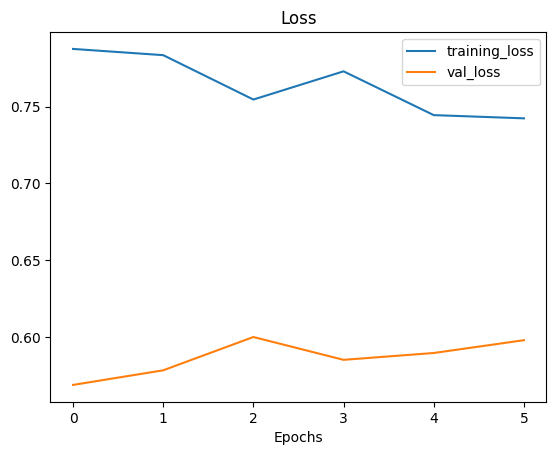

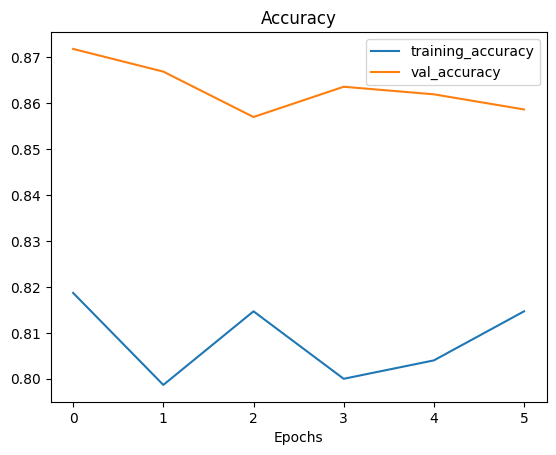

In [ ]:
plot_loss_curves(history_2_fine_tune)

In [ ]:
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compares two model history objects.
  """

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_acc = acc + new_history.history["val_accuracy"]
  total_val_loss = loss + new_history.history["val_loss"]

  # Plot for Accurcay
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Training Validation Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start Fine Tunig")
  plt.legend()
  plt.title("Training and Validation Accuracy")

  # Plot for Loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Training Validation Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start Fine Tunig")
  plt.legend()
  plt.title("Training and Validation Accuracy")


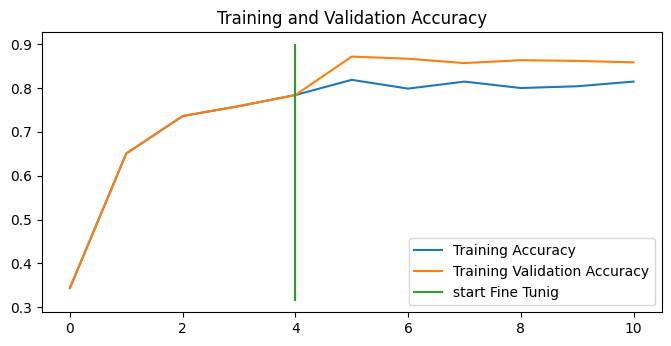

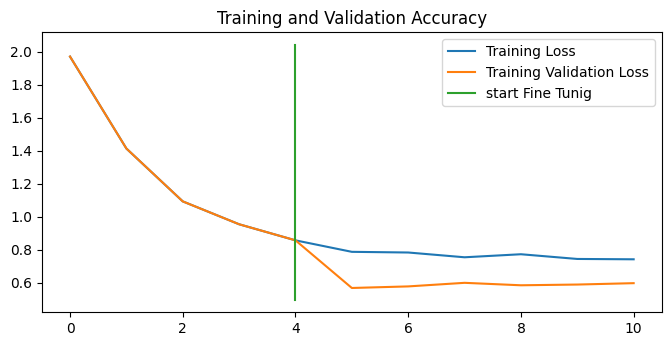

In [ ]:
compare_history(history_2, history_2_fine_tune)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2024-06-24 18:36:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.6’

10_food_classes_all 100%[===================>] 495.13M  49.1MB/s    in 6.8s    

2024-06-24 18:36:58 (72.8 MB/s) - ‘10_food_classes_all_data.zip.6’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode="categorical",image_size=IMG_SIZE)
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode="categorical",image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 7s 73ms/step - loss: 0.6132 - accuracy: 0.8364


[0.6132140755653381, 0.8363999724388123]

In [ ]:
evaluation_result_fine_tuning

[0.6132139563560486, 0.8363999724388123]

In [ ]:
model_2.load_weights(check_point_path)

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model

    return model

In [ ]:
model_2 = create_base_model()

In [ ]:
model_2.load_weights(check_point_path)

In [ ]:
model_2.layers[2].trainable=True

In [ ]:
for layer_num, layer in enumerate(model_2.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 True
3 gobal_average_pooling_layers True
4 dense True


In [ ]:
for layer in model_2.layers[2].layers[:-10]:
  layer.trainable = False

In [ ]:
for layer_num, layer in enumerate(model_2.layers[2].layers):
  print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [ ]:
model_2.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs+5
history_fine_tuning_all_data = model_2.fit(train_data_all,
                                           epochs=fine_tune_epochs,
                                           callbacks=[create_tensorboard_callback("transferlearning", "model_2_fine_tune_all_data") ],
                                           validation_data=test_data_all,
                                           validation_steps=int(0.25*len(test_data_all)),
                                           steps_per_epoch=len(train_data_all),
                                           initial_epoch=history_2.epoch[-1])

Saving TensorBoard log files to: transferlearning/model_2_fine_tune_all_data/20240624-183849
Epoch 5/10
235/235 [==============================] - 45s 146ms/step - loss: 0.6662 - accuracy: 0.7868 - val_loss: 0.3327 - val_accuracy: 0.8799
Epoch 6/10
235/235 [==============================] - 25s 102ms/step - loss: 0.5859 - accuracy: 0.8096 - val_loss: 0.3307 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 20s 82ms/step - loss: 0.5323 - accuracy: 0.8292 - val_loss: 0.2727 - val_accuracy: 0.9128
Epoch 8/10
235/235 [==============================] - 20s 85ms/step - loss: 0.5048 - accuracy: 0.8389 - val_loss: 0.2612 - val_accuracy: 0.9145
Epoch 9/10
235/235 [==============================] - 22s 91ms/step - loss: 0.4778 - accuracy: 0.8437 - val_loss: 0.2607 - val_accuracy: 0.9145
Epoch 10/10
235/235 [==============================] - 19s 80ms/step - loss: 0.4522 - accuracy: 0.8509 - val_loss: 0.2491 - val_accuracy: 0.9260


In [ ]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 7s 78ms/step - loss: 0.2552 - accuracy: 0.9168


[0.25517135858535767, 0.9168000221252441]

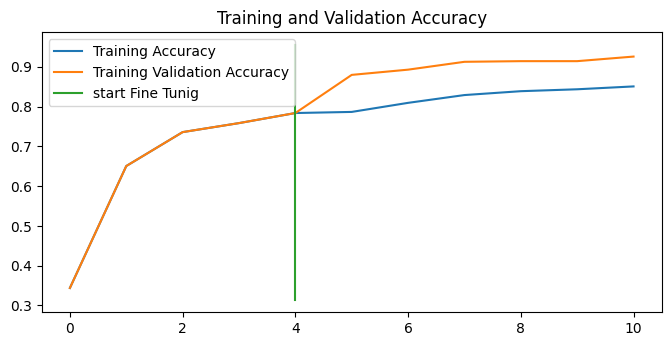

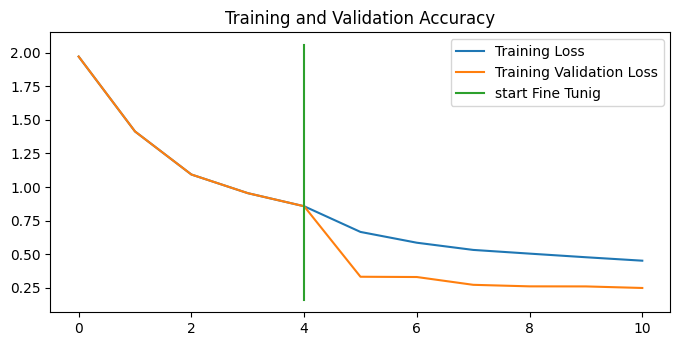

In [ ]:
compare_history(history_2, history_fine_tuning_all_data)